In [ ]:
# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\Shashank\Downloads\Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
x = df.drop(columns = 'Purchased')
y = df['Purchased']

In [5]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [7]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
x[['Age','EstimatedSalary']] = rc.fit_transform(x[['Age','EstimatedSalary']])

In [8]:
x

,Age,EstimatedSalary
0,-1.107692,-1.133333
1,-0.123077,-1.111111
2,-0.676923,-0.600000
3,-0.615385,-0.288889
4,-1.107692,0.133333
...,...,...
395,0.553846,-0.644444
396,0.861538,-1.044444
397,0.800000,-1.111111
398,-0.061538,-0.822222


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
x_test

,Age,EstimatedSalary
132,-0.430769,0.377778
309,0.061538,-0.444444
341,-0.123077,0.111111
196,-0.430769,0.200000
246,-0.123077,-0.444444
...,...,...
14,-1.169231,0.266667
363,0.307692,0.200000
304,0.184615,-0.222222
361,0.984615,-0.800000


In [11]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [15]:
y_test.value_counts()

Purchased
0    58
1    22
Name: count, dtype: int64

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[57  5]
 [ 1 17]]


In [19]:
accuracy_score(y_pred,y_test)

0.925

In [20]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        62
           1       0.77      0.94      0.85        18

    accuracy                           0.93        80
   macro avg       0.88      0.93      0.90        80
weighted avg       0.94      0.93      0.93        80



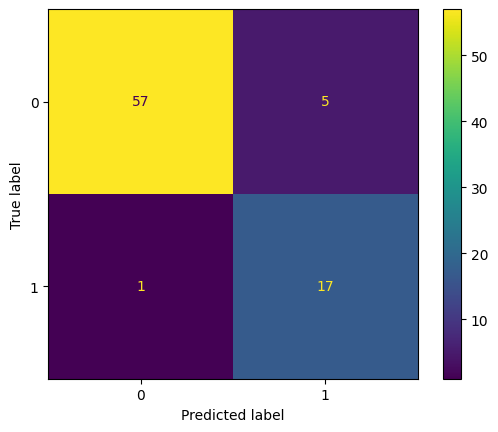

In [21]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])
cm_display.plot()

<Axes: >

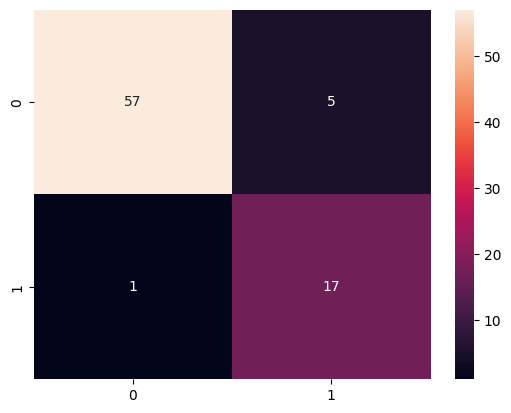

In [22]:
import seaborn as sns
sns.heatmap(cm,annot=True)